In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data=pd.read_csv("Desktop\d_seet.csv")

In [ ]:
data


,Unnamed: 0.1,gender,age,fever,cough,runny_nose,muscle_ache,pneumonia,diarrhea,lung_infection,...,pain,headache,tonsillarswelling,exudate,sudden,chest_pain,trestbps,fbs,thalach,target
0,0,0,68.0,1.0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,covid
1,1,0,50.0,1.0,1,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,covid
2,2,0,50.0,1.0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,covid
3,3,1,55.0,1.0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,covid
4,4,1,48.0,0.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,covid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57717,57717,1,0.0,0.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,1,crise_cardiaque
57718,57718,1,1.0,0.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,0,crise_cardiaque
57719,57719,1,0.0,0.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,1,crise_cardiaque
57720,57720,1,0.0,0.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,0,crise_cardiaque


In [ ]:
data.drop("Unnamed: 0",axis=1,inplace=True)

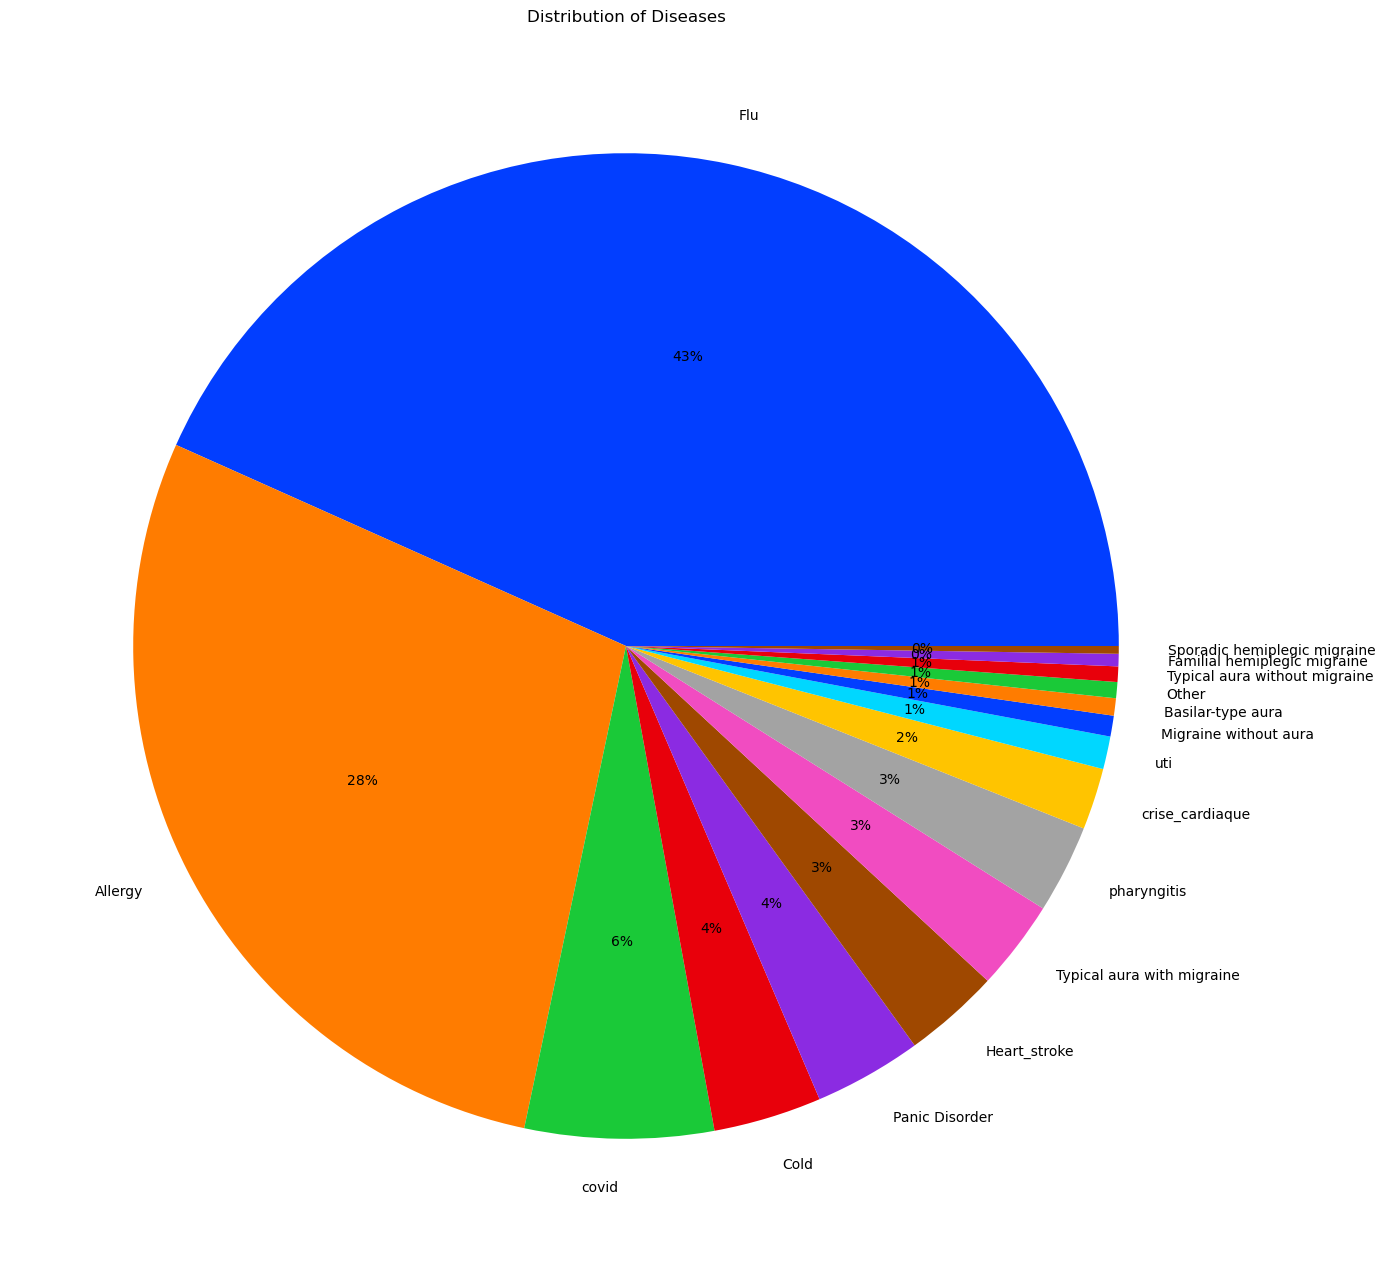

In [ ]:
num_diseases = data['target'].value_counts()
plt.figure(figsize=(20,16))
palette_color = sns.color_palette('bright')
plt.pie(num_diseases, labels=num_diseases.index, colors=palette_color, autopct='%.0f%%')
plt.title('Distribution of Diseases')
plt.show()

In [ ]:
data.loc[data['target'].str.contains("migraine", case=False, regex=True), 'target'] = 'magraine'
data.loc[data['target'].str.contains("basilar", case=False, regex=True), 'target'] = 'magraine'

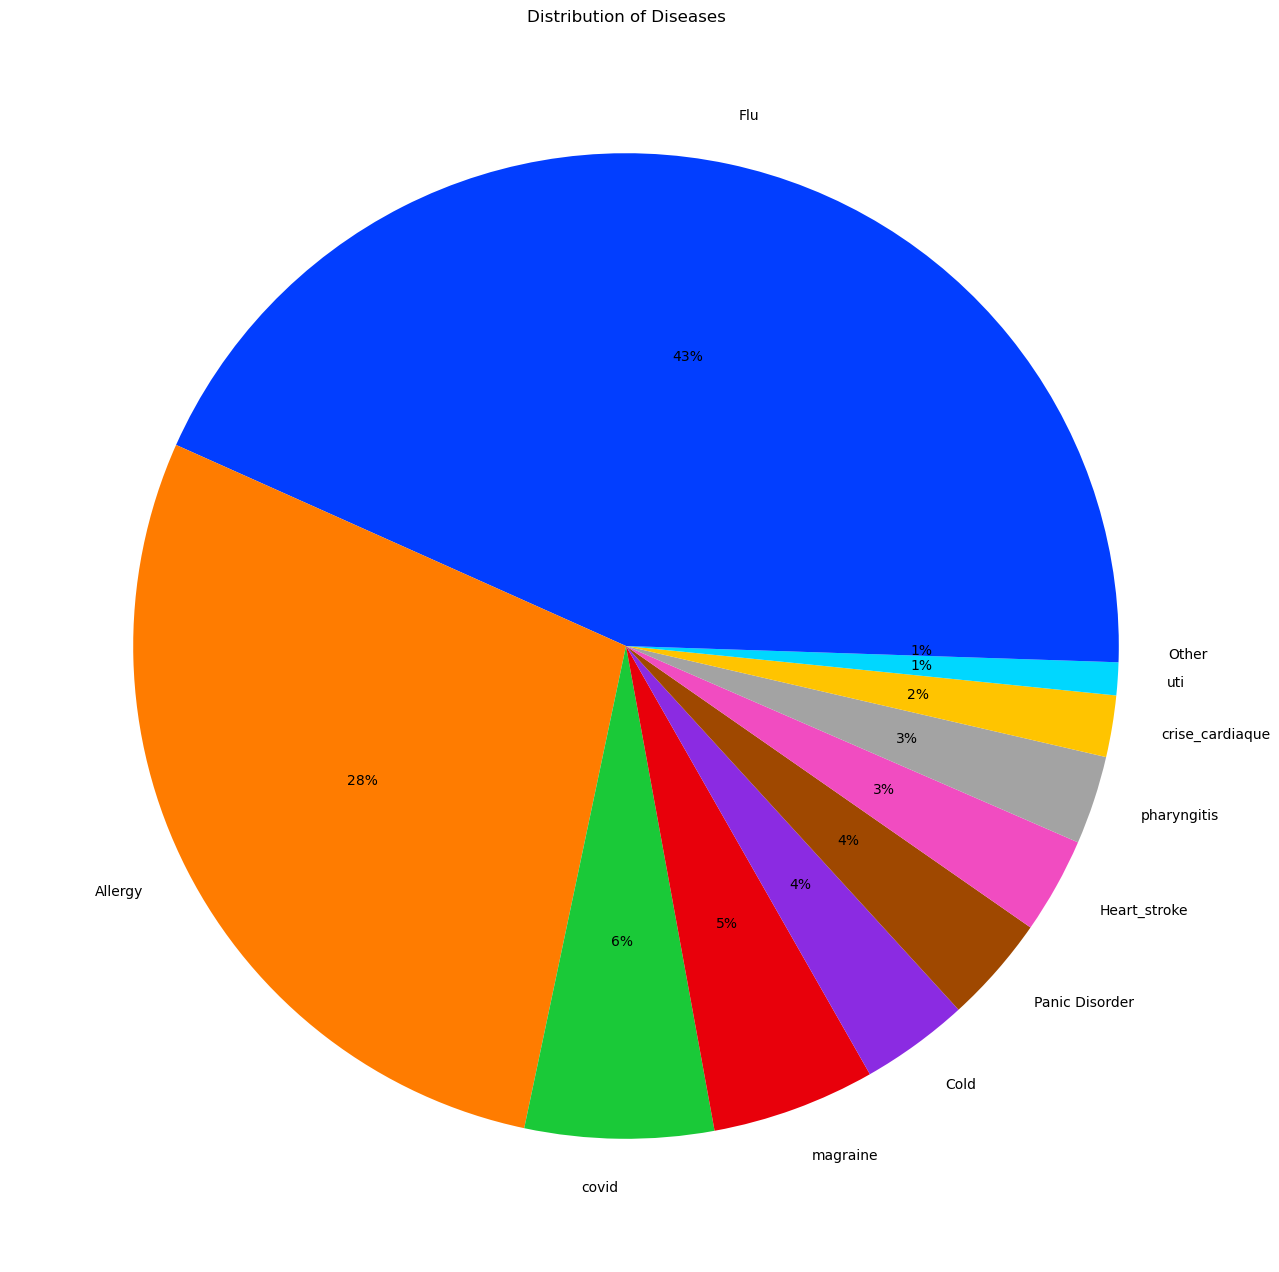

In [ ]:
num_diseases = data['target'].value_counts()
plt.figure(figsize=(20,16))
palette_color = sns.color_palette('bright')
plt.pie(num_diseases, labels=num_diseases.index, colors=palette_color, autopct='%.0f%%')
plt.title('Distribution of Diseases')
plt.show()

en principe on supprime "other" puisque il nest pas une maladie specifique

In [ ]:
data['target'].unique()

array(['covid', 'Heart_stroke', 'uti', 'Allergy', 'Cold', 'Flu',
       'magraine', 'Other', 'Panic Disorder', 'pharyngitis',
       'crise_cardiaque'], dtype=object)

In [ ]:
data.drop(data[data['target'] == 'Other'].index, inplace=True)

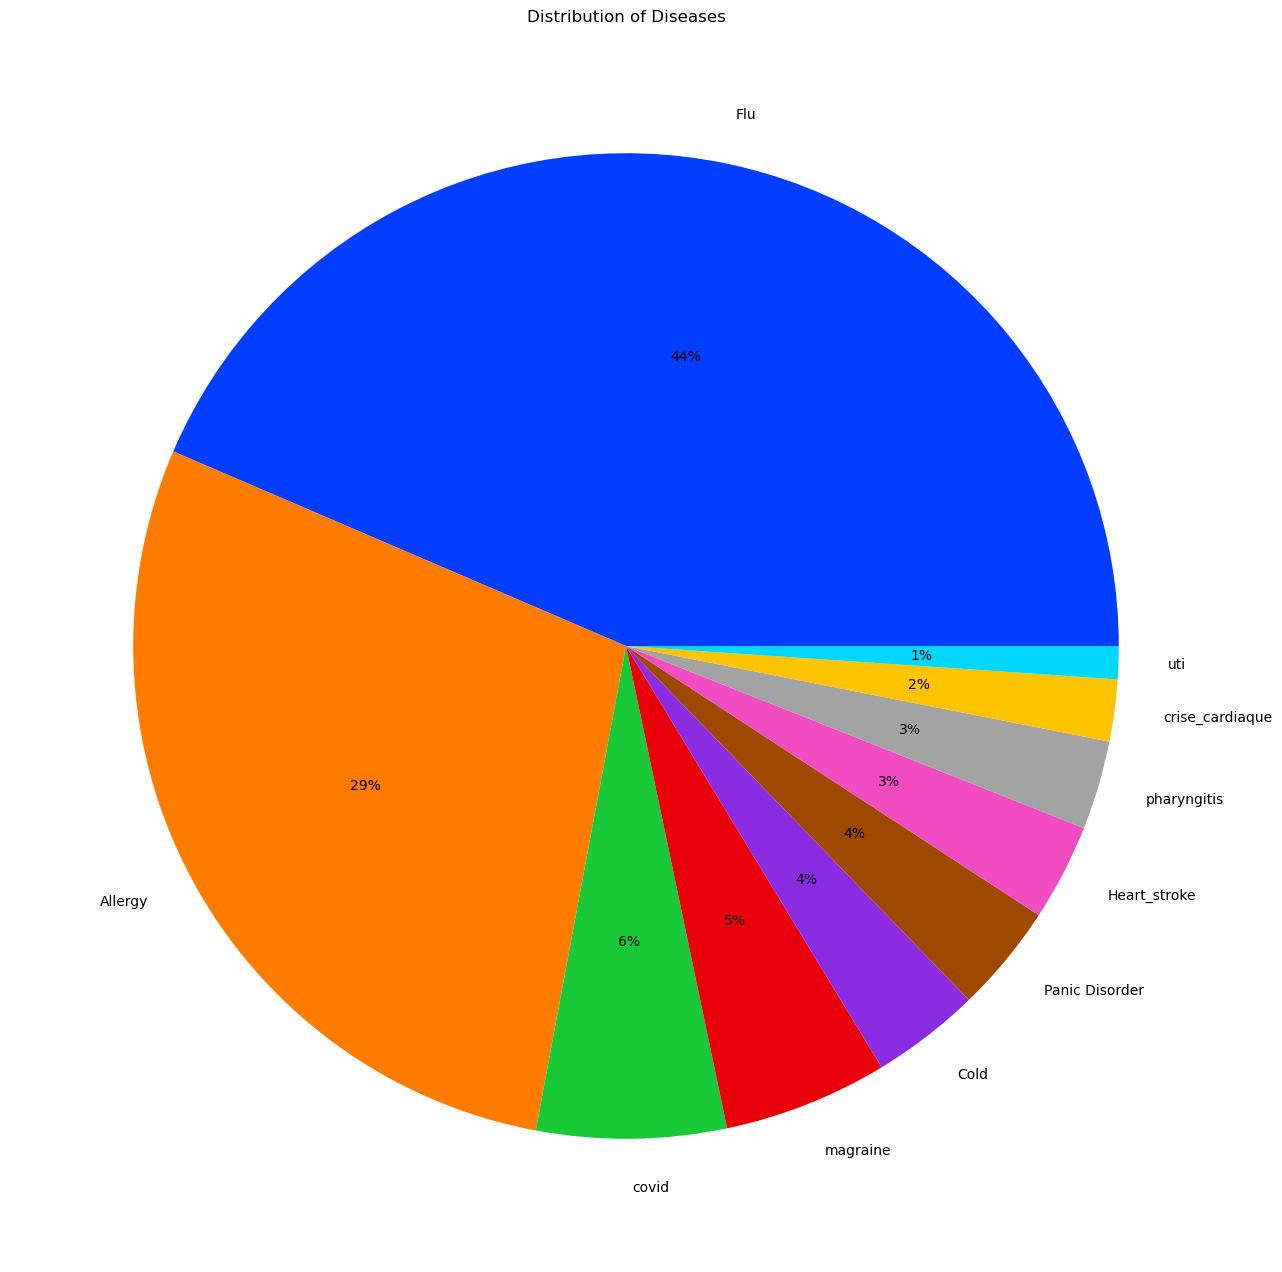

In [ ]:
num_diseases = data['target'].value_counts()
plt.figure(figsize=(20,16))
palette_color = sns.color_palette('bright')
plt.pie(num_diseases, labels=num_diseases.index, colors=palette_color, autopct='%.0f%%')
plt.title('Distribution of Diseases')
plt.show()

as you can see the top three diseases of this data are:
1/flu with 44% data percentage
2/allergy with 29% data percentage
3/Covid with 6% data percentage
it is an unbalanced data so the model enatrinement method must be a little different and it is necessary to use metrics other than accuracy such as "precision,F1-SCORE," and recall " to evaluate the model properly

In [ ]:
#condition_flu = data['target'] == 'Flu'
#condition_allergy = data['target'] == 'Allergy'
#condition_covid = data['target'] == 'covid'

#datatop_3_diseases = data[condition_flu | condition_allergy | condition_covid]
#top_3_diseases['age'].unique()

array([68., 50., 55., 48., 49., 44., 39., 47., 45., 59., 73., 63., 81.,
       41., 31., 66., 42., 37., 29., 74., 57., 35., 58., 33., 46.,  2.,
       26., 25., 80., 90., 65., 30., 56., 62., 34.,  9., 60., 87., 11.,
       32., 78., 52., 40., 53., 27., 51., 17., 28., 12., 36., 86., 61.,
       22., 70., 21., 43., 79., 38., 64., 19., 24., 20., 76., 54.,  5.,
       23.,  7., 72., 13., 84., 77., 15., 83.,  6., 69., 71.,  3., 67.,
       85., 16., 18.,  8., 75., 14., 89.,  1., 88., 96., 93., 82., 98.,
       10., 91., 97.,  4., 99., 94., 92., 95.])

In [ ]:
#data1=top_3_diseases
#data1['age_group'] = np.select(
#    [
#        data1['age'] <= 1.,
#        (data1['age'] > 1.) & (data1['age'] <= 12.),
#        (data1['age'] > 12.) & (data1['age'] <= 18.),
#        (data1['age'] > 18.) & (data1['age'] <= 65.),
#        data1['age'] > 65.
#    ],
#    [
#        'newborns',
#        'children',
#        'teenager',
#        'adult',
#        'Older adults'
#    ],
#    default='Unknown'
#)

C:\Users\mohamed choaib\AppData\Local\Temp\ipykernel_19372\3380468627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['age_group'] = np.select(


In [ ]:
#data1

,gender,age,fever,cough,runny_nose,muscle_ache,pneumonia,diarrhea,lung_infection,travel_history,...,headache,tonsillarswelling,exudate,sudden,chest_pain,trestbps,fbs,thalach,target,age_group
0,0,68.0,1.0,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0,0,0,0,covid,Older adults
1,0,50.0,1.0,1,1,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0,0,0,0,covid,adult
2,0,50.0,1.0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,covid,adult
3,1,55.0,1.0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,covid,adult
4,1,48.0,0.0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0,0,0,0,covid,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49435,1,41.0,1.0,1,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,Flu,adult
49436,0,35.0,1.0,1,1,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,Flu,adult
49437,1,31.0,0.0,0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,Flu,adult
49438,1,79.0,0.0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,Flu,Older adults


<Axes: xlabel='target', ylabel='count'>

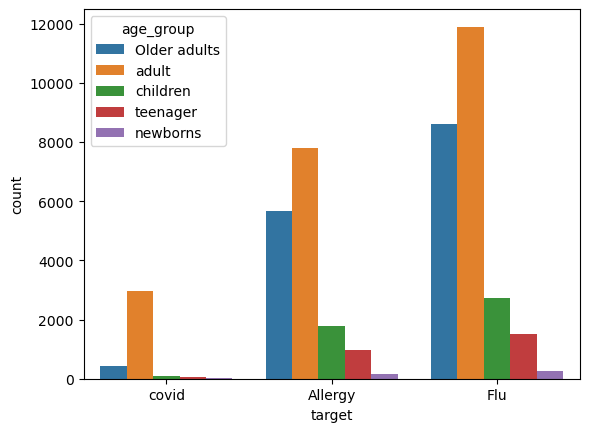

In [ ]:
#sns.countplot(data=data1,x='target',hue='age_group')

so the age groups that are most affected by these three diseases are primarily adults
and then the elderly this information shows that this dataset directed towards people who are over 18 years


In [ ]:
#allergy=data1[data1['target']=='Allergy']
#flu=data1[data1['target']=='Flu']
#covid=data1[data1['target']=='covid']
#def top3(data):
#    data.drop(['age','gender','target','age_group'],axis=1,inplace=True)
#    d=dict(data.sum())
#    t=sorted(d.items(), key=lambda x: x[1], reverse=True)
#    return t[:4]
#top3(covid),top3(flu),top3(allergy)

C:\Users\mohamed choaib\AppData\Local\Temp\ipykernel_19372\2169029411.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['age','gender','target','age_group'],axis=1,inplace=True)
C:\Users\mohamed choaib\AppData\Local\Temp\ipykernel_19372\2169029411.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['age','gender','target','age_group'],axis=1,inplace=True)
C:\Users\mohamed choaib\AppData\Local\Temp\ipykernel_19372\2169029411.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

([('fever', 2926.0),
  ('cough', 2687.0),
  ('isolation_treatment', 1625.0),
  ('lung_infection', 1550.0)],
 [('cough', 13418.0),
  ('vomit', 13402.0),
  ('DIFFICULTY_BREATHING', 13399.0),
  ('nausea', 13390.0)],
 [('PINK_EYE', 8195.0),
  ('LOSS_OF_TASTE', 8193.0),
  ('TIREDNESS', 8192.0),
  ('ITCHY_INNER_EAR', 8192.0)])

 so the most common symptoms are:
1/for covid:fever,cough,lung_infection
2/for flu:cough,vomit,DIFFICULTY_BREATHING,nausea
3/for allergy:PINK_EYE,LOSS_OF_TASTE,TIREDNESS,ITCHY_INNER_EAR

In [ ]:
data

,gender,age,fever,cough,runny_nose,muscle_ache,pneumonia,diarrhea,lung_infection,travel_history,...,pain,headache,tonsillarswelling,exudate,sudden,chest_pain,trestbps,fbs,thalach,target
0,0,68.0,1.0,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,covid
1,0,50.0,1.0,1,1,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,covid
2,0,50.0,1.0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,covid
3,1,55.0,1.0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,covid
4,1,48.0,0.0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,covid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57717,1,0.0,0.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,1,crise_cardiaque
57718,1,1.0,0.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,0,crise_cardiaque
57719,1,0.0,0.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,1,crise_cardiaque
57720,1,0.0,0.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,0,crise_cardiaque


In [ ]:
def to_int(data):
    cols = data.columns
    for col in cols:
        if data[col].dtype == 'float64' and all(data[col].isin([0, 1])):
            data[col] = data[col].astype(int)
    return data

data = to_int(data)
data

,gender,age,fever,cough,runny_nose,muscle_ache,pneumonia,diarrhea,lung_infection,travel_history,...,pain,headache,tonsillarswelling,exudate,sudden,chest_pain,trestbps,fbs,thalach,target
0,0,68.0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,covid
1,0,50.0,1,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,covid
2,0,50.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,covid
3,1,55.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,covid
4,1,48.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,covid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57717,1,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,crise_cardiaque
57718,1,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,crise_cardiaque
57719,1,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,crise_cardiaque
57720,1,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,crise_cardiaque


C:\Users\mohamed choaib\AppData\Local\Temp\ipykernel_15740\1302781330.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


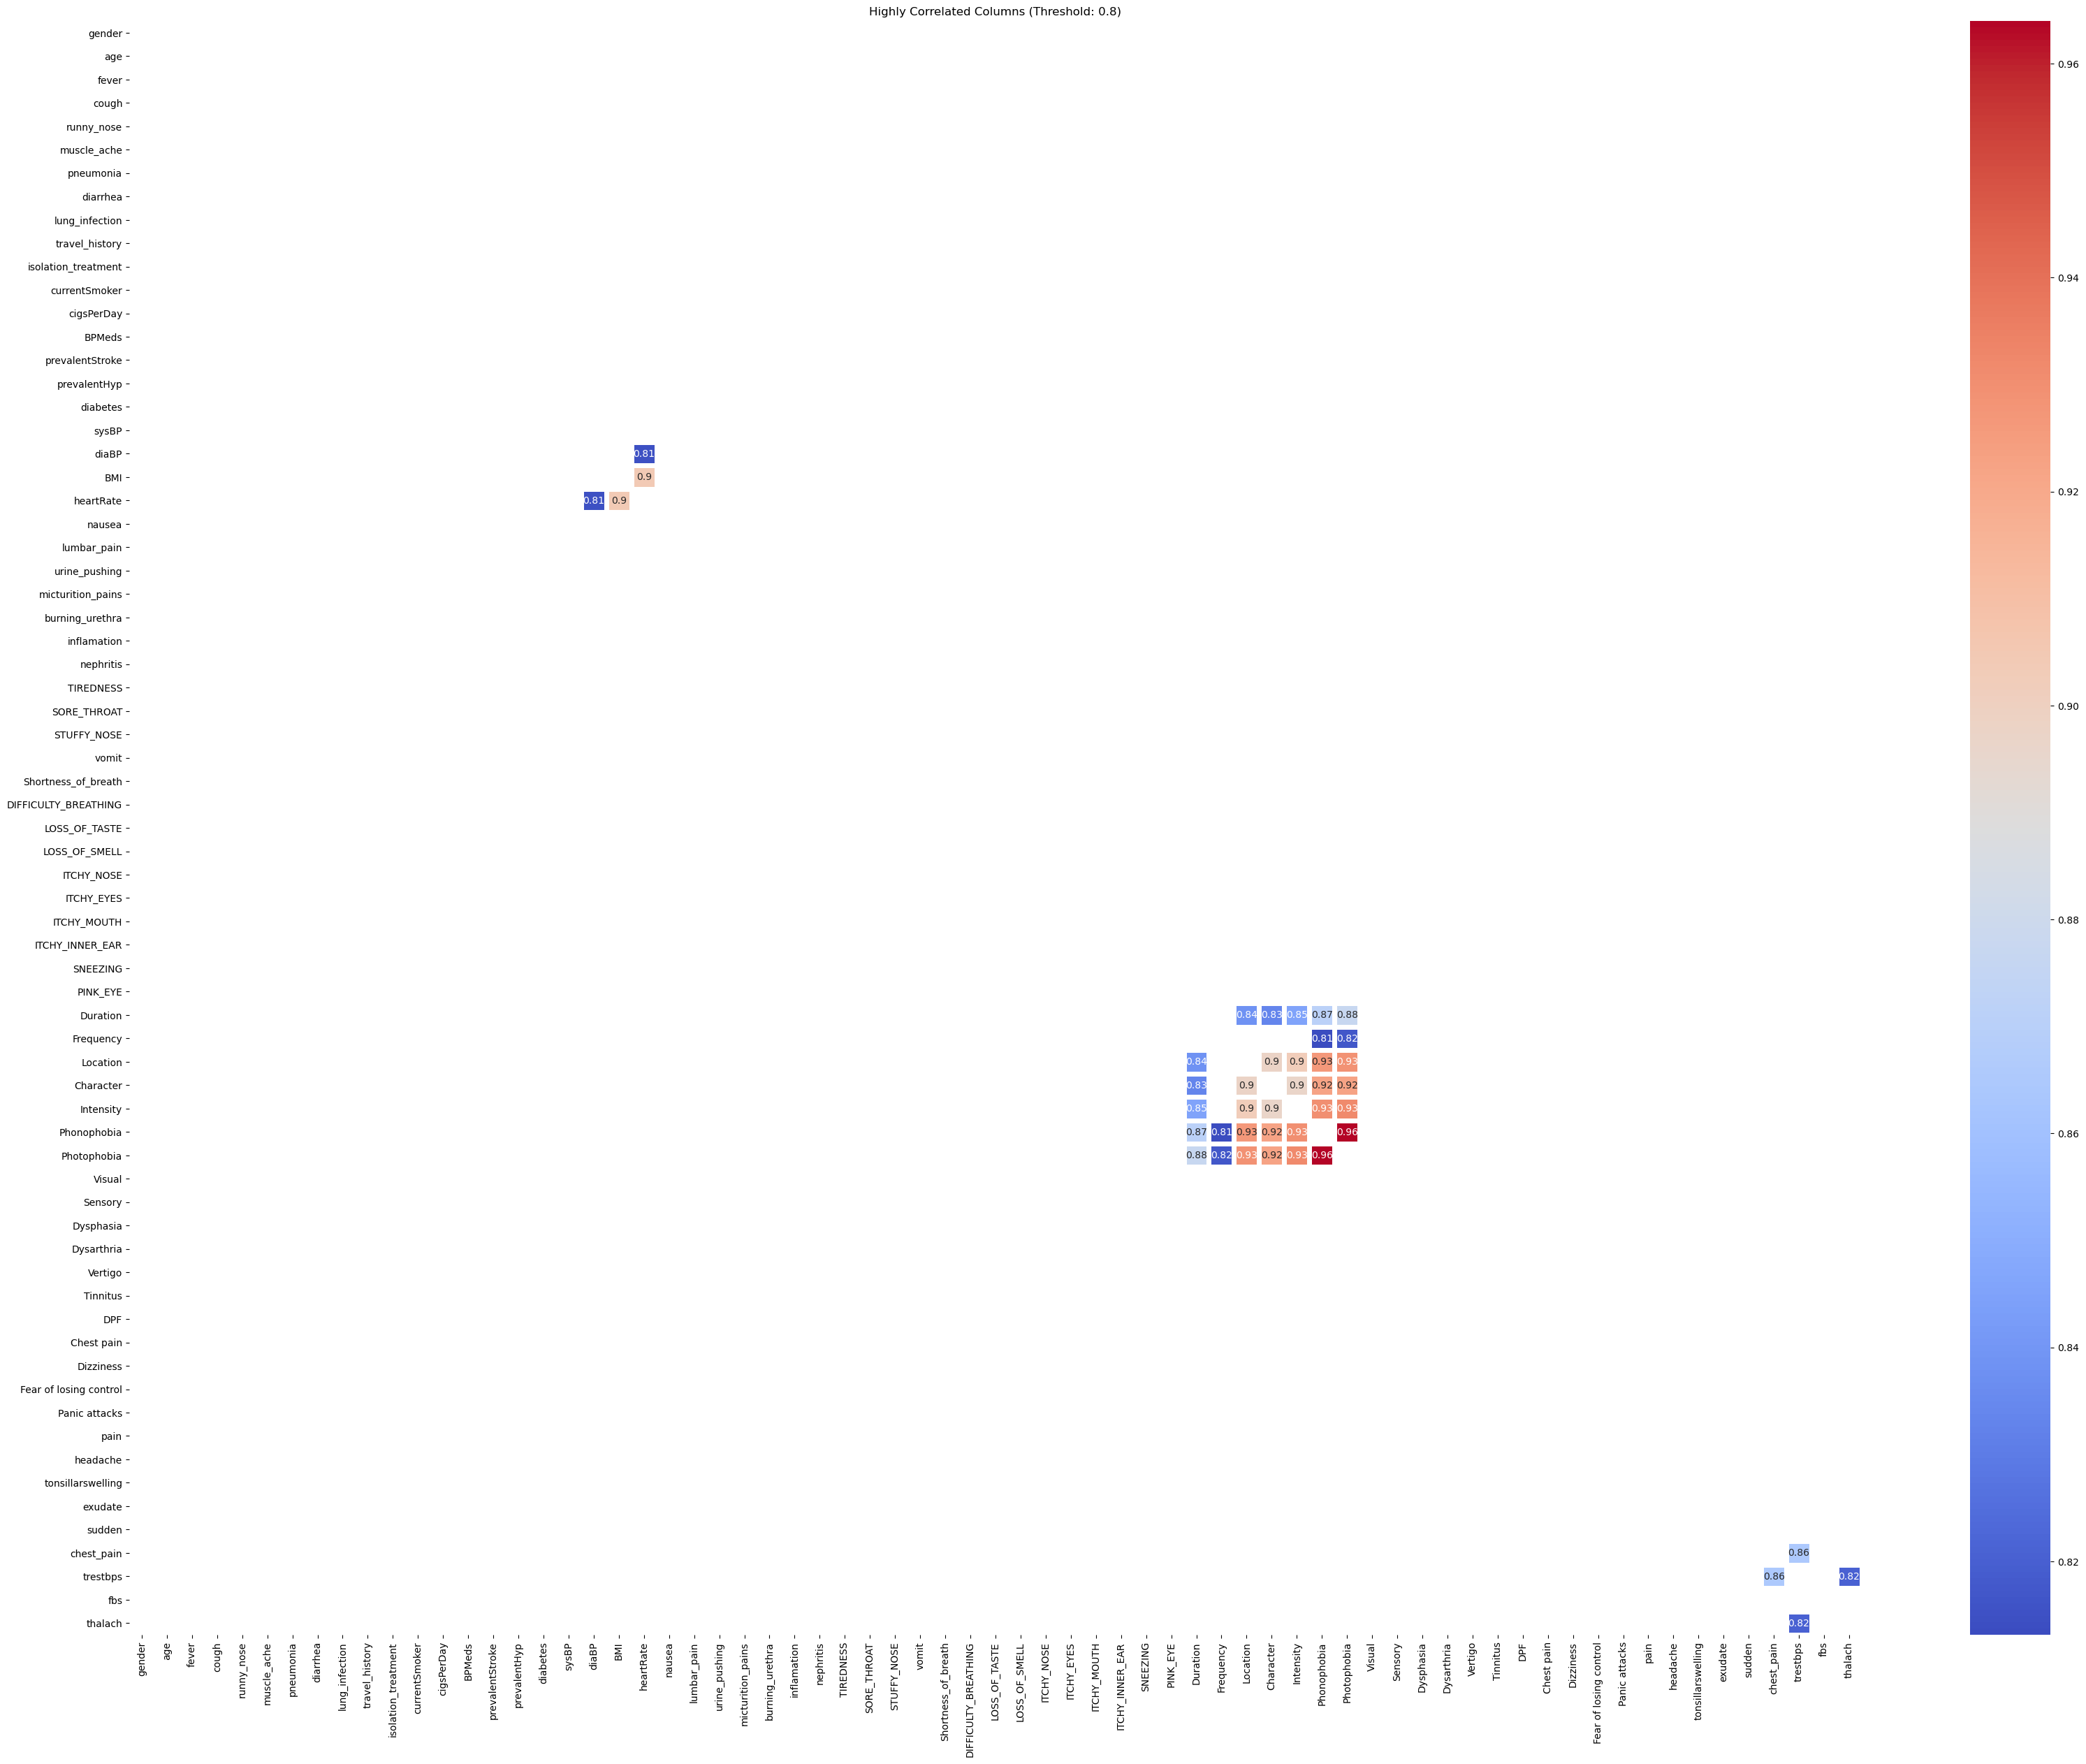

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded or created the DataFrame 'data'
correlation_matrix = data.corr()

# Set the threshold for correlation values
threshold = 0.8

# Filter the correlation matrix to keep only highly correlated values (positive or negative) excluding correlation of 1
high_correlation = correlation_matrix[((correlation_matrix >= threshold) | (correlation_matrix <= -threshold)) & (abs(correlation_matrix) != 1)]

# Plot the heatmap
plt.figure(figsize=(40, 30))  # Adjust the figure size as needed
sns.heatmap(high_correlation, annot=True, cmap='coolwarm', linewidths=5)
plt.title(f"Highly Correlated Columns (Threshold: {threshold})")
plt.show()


# **KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
(data.dtypes=='object').sum()

1

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Charger vos données (replace "votre_data.csv" avec le nom de votre fichier CSV)
data

# Diviser les données en fonction des features et de la variable cible
X = data.drop("target", axis=1)
y = data["target"]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir les valeurs des hyperparamètres à explorer
param_grid = {
    'n_neighbors': [10, 20, 100, 70, 5,1,3,6],     # Valeurs possibles pour le nombre de voisins
    'weights': ['uniform', 'distance'],  # Méthode de pondération des voisins ('uniform' ou 'distance')
    'p': [1, 2]                          # Paramètre p de la distance de Minkowski (1 pour la distance de Manhattan, 2 pour la distance euclidienne)
}

# Créer un classificateur k-NN
knn = KNeighborsClassifier()

# Utiliser StratifiedKFold pour la validation croisée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Recherche de grille avec StratifiedKFold
grid_search = GridSearchCV(knn, param_grid, cv=cv, n_jobs=-1, scoring='f1_macro') # Utilisez le score F1 macro pour l'évaluation


# Entraîner le modèle sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Obtenir les meilleurs hyperparamètres et le meilleur score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Meilleurs hyperparamètres:", best_params)
print("Meilleur score F1:", best_score)

# Prédire sur l'ensemble de test
y_pred = grid_search.predict(X_test)

# Calculer les métriques de performance
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Précision:", precision)
print("Rappel (Recall):", recall)
print("Score F1:", f1)

Meilleurs hyperparamètres: {'n_neighbors': 6, 'p': 1, 'weights': 'distance'}
Meilleur score F1: 0.9115871522941259
Précision: 0.9202935981611695
Rappel (Recall): 0.916010392798564
Score F1: 0.91600803456343


In [ ]:
from sklearn.metrics import classification_report
best_params = {'n_neighbors': 6, 'p': 1, 'weights': 'distance'}
best_model = KNeighborsClassifier(**best_params)
# Train the best model on the entire training data (no need to split again)
best_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate the classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(class_report)
class_names = label_encoder.classes_
class_names

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3244
           1       0.57      0.48      0.52       396
           2       0.98      0.97      0.98      4998
           3       1.00      1.00      1.00       372
           4       0.83      1.00      0.91       436
           5       0.91      0.96      0.94       727
           6       0.99      1.00      1.00       242
           7       1.00      1.00      1.00       617
           8       0.99      0.99      0.99       328
           9       0.97      0.79      0.87       124

    accuracy                           0.95     11484
   macro avg       0.92      0.92      0.92     11484
weighted avg       0.95      0.95      0.95     11484



array(['Allergy', 'Cold', 'Flu', 'Heart_stroke', 'Panic Disorder',
       'covid', 'crise_cardiaque', 'magraine', 'pharyngitis', 'uti'],
      dtype=object)

In [ ]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
run= RandomUnderSampler(sampling_strategy='not minority')
X_sm, y_sm = run.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)
best_params = {'n_neighbors': 6, 'p': 1, 'weights': 'distance'}
best_model = KNeighborsClassifier(**best_params)
# Train the best model on the entire training data (no need to split again)
best_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate the classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(class_report)
class_names = label_encoder.classes_
class_names

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.60      0.73       124
           1       0.56      0.81      0.66       124
           2       0.99      0.63      0.77       124
           3       1.00      1.00      1.00       124
           4       0.73      0.98      0.84       124
           5       0.82      0.86      0.84       124
           6       0.98      1.00      0.99       124
           7       1.00      1.00      1.00       124
           8       0.99      1.00      1.00       124
           9       0.98      0.86      0.92       124

    accuracy                           0.87      1240
   macro avg       0.90      0.87      0.88      1240
weighted avg       0.90      0.87      0.88      1240



array(['Allergy', 'Cold', 'Flu', 'Heart_stroke', 'Panic Disorder',
       'covid', 'crise_cardiaque', 'magraine', 'pharyngitis', 'uti'],
      dtype=object)

In [ ]:
# Assuming you have already loaded and preprocessed your data, and X and y are the feature and target variables.
from sklearn.preprocessing import LabelEncoder
# Class count
class_counts = data['target'].value_counts()

# Determine the minimum number of samples in a class
min_class_count = class_counts.min()

# Under-sample each class to have the same number of samples as the smallest class
df_under_sampled = pd.DataFrame()
for class_label in class_counts.index:
    df_class = data[data['target'] == class_label]
    df_class_under = df_class.sample(min_class_count, random_state=42)
    df_under_sampled = pd.concat([df_under_sampled, df_class_under])

print('Random under-sampling:')
print(df_under_sampled['target'].value_counts())

# Split the data into features (X_under) and target (y_under) variables
X_under = df_under_sampled.drop('target', axis=1)
y_under = df_under_sampled['target']
label_encoder = LabelEncoder()
y_under = label_encoder.fit_transform(y_under)

# Split the under-sampled data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=15, stratify=y_under)


Random under-sampling:
Flu                620
Allergy            620
covid              620
magraine           620
Cold               620
Panic Disorder     620
Heart_stroke       620
pharyngitis        620
crise_cardiaque    620
uti                620
Name: target, dtype: int64


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
best_params = {'n_neighbors': 6, 'p': 1, 'weights': 'distance'}
best_model = KNeighborsClassifier(**best_params)
# Train the best model on the entire training data (no need to split again)
best_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate the classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(class_report)
class_names = label_encoder.classes_
class_names

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.69      0.81       124
           1       0.63      0.84      0.72       124
           2       0.99      0.66      0.79       124
           3       1.00      1.00      1.00       124
           4       0.80      1.00      0.89       124
           5       0.83      0.92      0.87       124
           6       0.98      1.00      0.99       124
           7       1.00      1.00      1.00       124
           8       0.98      1.00      0.99       124
           9       0.99      0.90      0.95       124

    accuracy                           0.90      1240
   macro avg       0.92      0.90      0.90      1240
weighted avg       0.92      0.90      0.90      1240



array(['Allergy', 'Cold', 'Flu', 'Heart_stroke', 'Panic Disorder',
       'covid', 'crise_cardiaque', 'magraine', 'pharyngitis', 'uti'],
      dtype=object)

# SVM

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV

# Charger vos données (replace "votre_data.csv" avec le nom de votre fichier CSV)
data

# Diviser les données en fonction des features et de la variable cible
X = data.drop("target", axis=1)
y = data["target"]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
pip install optuna

     ------------------------------------ 390.6/390.6 kB 837.8 kB/s eta 0:00:00
     -------------------------------------- 224.5/224.5 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 78.7/78.7 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import optuna

In [ ]:

from sklearn.svm import SVC
def objective(trial):
    # Define the hyperparameter search space
    params = {
            'kernel': 'poly',
        'degree': trial.suggest_int('degree', 1, 4),
    }

    # Create the SVM model
    model = SVC(**params)

    # Split the data into training and validation sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the validation set and calculate the F1 score
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred,average='weighted')
    return score

# Create an Optuna study object and optimize the objective function
study = optuna.create_study(direction='maximize')  # For F1 score, maximize the metric
study.optimize(objective, n_trials=10)  # Number of trials to search for optimal hyperparameters

# Print the best hyperparameters and the corresponding metric score
print("Best Hyperparameters:", study.best_params)
print("Best F1 Score:", study.best_value)

[I 2023-07-19 16:17:58,627] A new study created in memory with name: no-name-7b7bc6d7-72e3-46ce-8641-2b531499c401
[I 2023-07-19 16:22:08,874] Trial 0 finished with value: 0.6436338411123015 and parameters: {'degree': 4}. Best is trial 0 with value: 0.6436338411123015.
[I 2023-07-19 16:26:13,844] Trial 1 finished with value: 0.6436338411123015 and parameters: {'degree': 4}. Best is trial 0 with value: 0.6436338411123015.
[I 2023-07-19 16:30:14,756] Trial 2 finished with value: 0.6436338411123015 and parameters: {'degree': 4}. Best is trial 0 with value: 0.6436338411123015.
[I 2023-07-19 16:34:19,831] Trial 3 finished with value: 0.6773670913015871 and parameters: {'degree': 3}. Best is trial 3 with value: 0.6773670913015871.
[I 2023-07-19 16:38:10,198] Trial 4 finished with value: 0.6773670913015871 and parameters: {'degree': 3}. Best is trial 3 with value: 0.6773670913015871.
[I 2023-07-19 16:40:54,272] Trial 5 finished with value: 0.8743663472055042 and parameters: {'degree': 1}. Best

Best Hyperparameters: {'degree': 1}
Best F1 Score: 0.8743663472055042


In [ ]:
Best Hyperparameters: {'C': 5.239432435143555, 'gamma': 0.03377235928893512}
Best F1 Score: 0.9814668308309831

SyntaxError: invalid syntax (2744198381.py, line 1)

In [ ]:
# Assuming you have already loaded and preprocessed your data, and X and y are the feature and target variables.

# Class count
class_counts = data['target'].value_counts()

# Determine the minimum number of samples in a class
min_class_count = class_counts.min()

# Under-sample each class to have the same number of samples as the smallest class
df_under_sampled = pd.DataFrame()
for class_label in class_counts.index:
    df_class = data[data['target'] == class_label]
    df_class_under = df_class.sample(min_class_count, random_state=42)
    df_under_sampled = pd.concat([df_under_sampled, df_class_under])

print('Random under-sampling:')
print(df_under_sampled['target'].value_counts())

# Split the data into features (X_under) and target (y_under) variables
X_under = df_under_sampled.drop('target', axis=1)
y_under = df_under_sampled['target']
label_encoder = LabelEncoder()
y_under = label_encoder.fit_transform(y_under)
# Split the under-sampled data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=15, stratify=y_under)

Random under-sampling:
Flu                620
Allergy            620
covid              620
magraine           620
Cold               620
Panic Disorder     620
Heart_stroke       620
pharyngitis        620
crise_cardiaque    620
uti                620
Name: target, dtype: int64


In [ ]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
params = {'kernel': 'linear', 'C':5.239, 'gamma':0.033}
model = SVC(**params)
# Train the best model on the entire training data (no need to split again)
model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = model.predict(X_test)

# Calculate the classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(class_report)
class_names = label_encoder.classes_
class_names

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.94      0.97      0.96       124
           2       0.99      0.98      0.98       124
           3       1.00      1.00      1.00       124
           4       0.99      1.00      1.00       124
           5       0.96      0.98      0.97       124
           6       1.00      1.00      1.00       124
           7       1.00      1.00      1.00       124
           8       0.98      1.00      0.99       124
           9       1.00      0.97      0.98       124

    accuracy                           0.99      1240
   macro avg       0.99      0.99      0.99      1240
weighted avg       0.99      0.99      0.99      1240



array(['Allergy', 'Cold', 'Flu', 'Heart_stroke', 'Panic Disorder',
       'covid', 'crise_cardiaque', 'magraine', 'pharyngitis', 'uti'],
      dtype=object)

# random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import optuna

def objective(trial):
    # Define the hyperparameter search space for the Random Forest
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 200),         # Number of trees in the forest
        'max_depth': trial.suggest_int('max_depth', 5, 50),                  # Maximum depth of the tree
        'min_samples_split': trial.suggest_float('min_samples_split', 0.1, 1.0),  # Minimum number of samples required to split an internal node
        'min_samples_leaf': trial.suggest_float('min_samples_leaf', 0.01, 0.9),    # Minimum number of samples required to be at a leaf node
    }

    # Create the Random Forest model
    model = RandomForestClassifier(**params)

    # Split the data into training and validation sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the validation set and calculate the F1 score
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred, average='weighted')
    return score

# Create an Optuna study object and optimize the objective function
study = optuna.create_study(direction='maximize')  # For F1 score, maximize the metric
study.optimize(objective, n_trials=100)  # Number of trials to search for optimal hyperparameters

# Print the best hyperparameters and the corresponding metric score
print("Best Hyperparameters:", study.best_params)
print("Best F1 Score:", study.best_value)


[I 2023-07-19 22:01:20,609] A new study created in memory with name: no-name-cd8a6591-cee1-454b-9418-2a8b592d3a22
[I 2023-07-19 22:01:21,449] Trial 0 finished with value: 0.26394862601131514 and parameters: {'n_estimators': 133, 'max_depth': 7, 'min_samples_split': 0.8192695399503432, 'min_samples_leaf': 0.1967344918743578}. Best is trial 0 with value: 0.26394862601131514.
[I 2023-07-19 22:01:22,161] Trial 1 finished with value: 0.26394862601131514 and parameters: {'n_estimators': 120, 'max_depth': 37, 'min_samples_split': 0.9547126272481267, 'min_samples_leaf': 0.4444243683317788}. Best is trial 0 with value: 0.26394862601131514.
[I 2023-07-19 22:01:24,007] Trial 2 finished with value: 0.600672490082871 and parameters: {'n_estimators': 163, 'max_depth': 50, 'min_samples_split': 0.19732831002961132, 'min_samples_leaf': 0.08900157396656125}. Best is trial 2 with value: 0.600672490082871.
[I 2023-07-19 22:01:24,886] Trial 3 finished with value: 0.26394862601131514 and parameters: {'n_est

Best Hyperparameters: {'n_estimators': 200, 'max_depth': 45, 'min_samples_split': 0.10258886696393944, 'min_samples_leaf': 0.010029874226207911}
Best F1 Score: 0.9197812105288766


In [ ]:

from sklearn.metrics import classification_report
params={'n_estimators': 200, 'max_depth': 45, 'min_samples_split': 0.10258886696393944, 'min_samples_leaf': 0.010029874226207911}
model = RandomForestClassifier(**params)
# Train the best model on the entire training data (no need to split again)
model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = model.predict(X_test)

# Calculate the classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(class_report)
class_names = label_encoder.classes_
class_names



Classification Report:
                 precision    recall  f1-score   support

        Allergy       1.00      0.96      0.98       124
           Cold       0.89      0.85      0.87       124
            Flu       1.00      0.93      0.96       124
   Heart_stroke       1.00      1.00      1.00       124
 Panic Disorder       0.88      1.00      0.94       124
          covid       0.88      0.91      0.89       124
crise_cardiaque       0.98      1.00      0.99       124
       magraine       1.00      1.00      1.00       124
    pharyngitis       1.00      1.00      1.00       124
            uti       1.00      0.96      0.98       124

       accuracy                           0.96      1240
      macro avg       0.96      0.96      0.96      1240
   weighted avg       0.96      0.96      0.96      1240



array(['Allergy', 'Cold', 'Flu', 'Heart_stroke', 'Panic Disorder',
       'covid', 'crise_cardiaque', 'magraine', 'pharyngitis', 'uti'],
      dtype=object)

In [ ]:
# Assuming you have already loaded and preprocessed your data, and X and y are the feature and target variables.

# Class count
class_counts = data['target'].value_counts()

# Determine the minimum number of samples in a class
min_class_count = class_counts.min()

# Under-sample each class to have the same number of samples as the smallest class
df_under_sampled = pd.DataFrame()
for class_label in class_counts.index:
    df_class = data[data['target'] == class_label]
    df_class_under = df_class.sample(min_class_count, random_state=42)
    df_under_sampled = pd.concat([df_under_sampled, df_class_under])

print('Random under-sampling:')
print(df_under_sampled['target'].value_counts())

# Split the data into features (X_under) and target (y_under) variables
X_under = df_under_sampled.drop('target', axis=1)
y_under = df_under_sampled['target']
label_encoder = LabelEncoder()
y_under = label_encoder.fit_transform(y_under)

# Split the under-sampled data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=15, stratify=y_under)

Random under-sampling:
Flu                620
Allergy            620
covid              620
magraine           620
Cold               620
Panic Disorder     620
Heart_stroke       620
pharyngitis        620
crise_cardiaque    620
uti                620
Name: target, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
params={'n_estimators': 200, 'max_depth': 45, 'min_samples_split': 0.10258886696393944, 'min_samples_leaf': 0.010029874226207911}
model = RandomForestClassifier(**params)
# Train the best model on the entire training data (no need to split again)
model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = model.predict(X_test)

# Calculate the classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(class_report)
class_names = label_encoder.classes_
class_names


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.91      0.89      0.90       124
           2       1.00      0.94      0.97       124
           3       1.00      1.00      1.00       124
           4       0.89      1.00      0.94       124
           5       0.90      0.92      0.91       124
           6       0.99      1.00      1.00       124
           7       1.00      1.00      1.00       124
           8       0.99      1.00      1.00       124
           9       1.00      0.95      0.98       124

    accuracy                           0.97      1240
   macro avg       0.97      0.97      0.97      1240
weighted avg       0.97      0.97      0.97      1240



array(['Allergy', 'Cold', 'Flu', 'Heart_stroke', 'Panic Disorder',
       'covid', 'crise_cardiaque', 'magraine', 'pharyngitis', 'uti'],
      dtype=object)

# naive bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import optuna

def objective(trial):
    # Define the hyperparameter search space for the Laplace smoothing parameter (alpha)
    alpha = trial.suggest_loguniform('alpha', 1e-6, 1e0)

    # Create the Naive Bayes model
    model = MultinomialNB(alpha=alpha)

    # Split the data into training and validation sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the validation set and calculate the F1 score
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred, average='weighted')
    return score

# Create an Optuna study object and optimize the objective function
study = optuna.create_study(direction='maximize')  # For F1 score, maximize the metric
study.optimize(objective, n_trials=150)  # Number of trials to search for optimal hyperparameters

# Print the best hyperparameters and the corresponding metric score
print("Best Smoothing Parameter (alpha):", study.best_params['alpha'])
print("Best F1 Score:", study.best_value)


[I 2023-07-19 22:21:46,514] A new study created in memory with name: no-name-5326e041-089a-44a8-99c8-f25d179a3e27
C:\Users\mohamed choaib\AppData\Local\Temp\ipykernel_11436\1152357220.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-6, 1e0)
[I 2023-07-19 22:21:46,593] Trial 0 finished with value: 0.967686115129416 and parameters: {'alpha': 0.21951200412600938}. Best is trial 0 with value: 0.967686115129416.
C:\Users\mohamed choaib\AppData\Local\Temp\ipykernel_11436\1152357220.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-6, 1e0)
[I 2023-07-19 22:21:46,674] Trial 1 finished

Best Smoothing Parameter (alpha): 0.002763496848071261
Best F1 Score: 0.9678010058800398


In [ ]:
from sklearn.metrics import classification_report
model = MultinomialNB(alpha= 0.002763496848071261)
# Train the best model on the entire training data (no need to split again)
model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = model.predict(X_test)

# Calculate the classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(class_report)
class_names = label_encoder.classes_
class_names


Classification Report:
                 precision    recall  f1-score   support

        Allergy       1.00      0.98      0.99       124
           Cold       0.95      0.98      0.96       124
            Flu       0.99      0.98      0.98       124
   Heart_stroke       1.00      1.00      1.00       124
 Panic Disorder       0.98      1.00      0.99       124
          covid       0.97      0.99      0.98       124
crise_cardiaque       1.00      1.00      1.00       124
       magraine       1.00      1.00      1.00       124
    pharyngitis       1.00      1.00      1.00       124
            uti       1.00      0.98      0.99       124

       accuracy                           0.99      1240
      macro avg       0.99      0.99      0.99      1240
   weighted avg       0.99      0.99      0.99      1240



array(['Allergy', 'Cold', 'Flu', 'Heart_stroke', 'Panic Disorder',
       'covid', 'crise_cardiaque', 'magraine', 'pharyngitis', 'uti'],
      dtype=object)

In [ ]:
# Assuming you have already loaded and preprocessed your data, and X and y are the feature and target variables.

# Class count
class_counts = data['target'].value_counts()

# Determine the minimum number of samples in a class
min_class_count = class_counts.min()

# Under-sample each class to have the same number of samples as the smallest class
df_under_sampled = pd.DataFrame()
for class_label in class_counts.index:
    df_class = data[data['target'] == class_label]
    df_class_under = df_class.sample(min_class_count, random_state=42)
    df_under_sampled = pd.concat([df_under_sampled, df_class_under])

print('Random under-sampling:')
print(df_under_sampled['target'].value_counts())

# Split the data into features (X_under) and target (y_under) variables
X_under = df_under_sampled.drop('target', axis=1)
y_under = df_under_sampled['target']
label_encoder = LabelEncoder()
y_under = label_encoder.fit_transform(y_under)


# Split the under-sampled data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=15, stratify=y_under)

Random under-sampling:
Flu                620
Allergy            620
covid              620
magraine           620
Cold               620
Panic Disorder     620
Heart_stroke       620
pharyngitis        620
crise_cardiaque    620
uti                620
Name: target, dtype: int64


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
model = MultinomialNB(alpha= 0.002763496848071261)
# Train the best model on the entire training data (no need to split again)
model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = model.predict(X_test)

# Calculate the classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(class_report)
class_names = label_encoder.classes_
class_names


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.95      0.98      0.96       124
           2       0.99      0.98      0.98       124
           3       1.00      1.00      1.00       124
           4       0.98      1.00      0.99       124
           5       0.97      0.99      0.98       124
           6       1.00      1.00      1.00       124
           7       1.00      1.00      1.00       124
           8       1.00      1.00      1.00       124
           9       1.00      0.98      0.99       124

    accuracy                           0.99      1240
   macro avg       0.99      0.99      0.99      1240
weighted avg       0.99      0.99      0.99      1240



array(['Allergy', 'Cold', 'Flu', 'Heart_stroke', 'Panic Disorder',
       'covid', 'crise_cardiaque', 'magraine', 'pharyngitis', 'uti'],
      dtype=object)

# xgboost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import optuna

X = data.drop("target", axis=1)
y = data["target"]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

def objective(trial):
    # Define the hyperparameter search space for XGBoost
    params = {
        'objective': 'multi:softmax',       # Multiclass classification with integer labels
        'num_class': num_classes,          # Number of classes in your dataset
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'lambda': trial.suggest_loguniform('lambda', 1e-5, 1.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-5, 1.0),
    }

    # Create the XGBoost model
    model = xgb.XGBClassifier(**params)

    # Split the data into training and validation sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the validation set and calculate the F1 score
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred, average='weighted')
    return score

# Create an Optuna study object and optimize the objective function
study = optuna.create_study(direction='maximize')  # For F1 score, maximize the metric
study.optimize(objective, n_trials=100)  # Number of trials to search for optimal hyperparameters

# Print the best hyperparameters and the corresponding metric score
print("Best Hyperparameters:", study.best_params)
print("Best F1 Score:", study.best_value)


[I 2023-07-19 22:54:20,515] A new study created in memory with name: no-name-1f5db052-41ea-4aff-a0ab-f6fc5aa8d0ce
C:\Users\mohamed choaib\AppData\Local\Temp\ipykernel_11436\4020343621.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\mohamed choaib\AppData\Local\Temp\ipykernel_11436\4020343621.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-5, 1.0),
C:\Users\mohamed choaib\AppData\Local\Temp\ipykernel_11436\4020343621.py:24: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

Best Hyperparameters: {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.04251560963359593, 'subsample': 0.6654551772768543, 'colsample_bytree': 0.9025561411277078, 'lambda': 0.33011265444179677, 'alpha': 0.03447138678360461}
Best F1 Score: 0.9841586997879553


(array([5, 5, 5, ..., 6, 6, 6]),
 23173               Cold
 1587               covid
 4181        Heart_stroke
 56649    crise_cardiaque
 4995        Heart_stroke
               ...       
 5228        Heart_stroke
 57293    crise_cardiaque
 55736        pharyngitis
 55306        pharyngitis
 53584     Panic Disorder
 Name: target, Length: 4960, dtype: object)

In [ ]:
from sklearn.metrics import classification_report
X = data.drop("target", axis=1)
y = data["target"]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params= {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.04251560963359593, 'subsample': 0.6654551772768543, 'colsample_bytree': 0.9025561411277078, 'lambda': 0.33011265444179677, 'alpha': 0.03447138678360461}
model = xgb.XGBClassifier(**params)
# Train the best model on the entire training data (no need to split again)
model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = model.predict(X_test)

# Calculate the classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(class_report)
class_names = label_encoder.classes_
class_names

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3244
           1       0.69      0.97      0.81       396
           2       1.00      0.99      0.99      4998
           3       1.00      1.00      1.00       372
           4       0.97      1.00      0.98       436
           5       0.99      0.98      0.99       727
           6       1.00      1.00      1.00       242
           7       1.00      1.00      1.00       617
           8       1.00      1.00      1.00       328
           9       1.00      0.98      0.99       124

    accuracy                           0.98     11484
   macro avg       0.96      0.99      0.97     11484
weighted avg       0.99      0.98      0.98     11484



array(['Allergy', 'Cold', 'Flu', 'Heart_stroke', 'Panic Disorder',
       'covid', 'crise_cardiaque', 'magraine', 'pharyngitis', 'uti'],
      dtype=object)

In [ ]:
# Assuming you have already loaded and preprocessed your data, and X and y are the feature and target variables.

# Class count
class_counts = data['target'].value_counts()

# Determine the minimum number of samples in a class
min_class_count = class_counts.min()

# Under-sample each class to have the same number of samples as the smallest class
df_under_sampled = pd.DataFrame()
for class_label in class_counts.index:
    df_class = data[data['target'] == class_label]
    df_class_under = df_class.sample(min_class_count, random_state=42)
    df_under_sampled = pd.concat([df_under_sampled, df_class_under])

print('Random under-sampling:')
print(df_under_sampled['target'].value_counts())

# Split the data into features (X_under) and target (y_under) variables
X_under = df_under_sampled.drop('target', axis=1)
y_under = df_under_sampled['target']
label_encoder = LabelEncoder()
y_under = label_encoder.fit_transform(y_under)


# Split the under-sampled data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=15, stratify=y_under)

Random under-sampling:
Flu                620
Allergy            620
covid              620
magraine           620
Cold               620
Panic Disorder     620
Heart_stroke       620
pharyngitis        620
crise_cardiaque    620
uti                620
Name: target, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
label_encoder = LabelEncoder()
y_under = label_encoder.fit_transform(y_under)
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=15, stratify=y_under)
params= {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.04251560963359593, 'subsample': 0.6654551772768543, 'colsample_bytree': 0.9025561411277078, 'lambda': 0.33011265444179677, 'alpha': 0.03447138678360461}
model = xgb.XGBClassifier(**params)
# Train the best model on the entire training data (no need to split again)
model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = model.predict(X_test)

# Calculate the classification report
class_report = f1_score(y_test, y_pred,average='weighted')

# Print the classification report
print("Classification Report:")
print(class_report)
class_names = label_encoder.classes_
class_names

Classification Report:
0.9887634846856405


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)


In [ ]:
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred,average='weighted')
y_train_pred=model.predict(X_train)
f2 = f1_score(y_train, y_train_pred,average='weighted')
f1,f2

(0.9794024249213641, 0.9816249570495822)

## Under-sampling improved precision and F1-score across all algorithms

[ 396  793 1190 1587 1984 2380 2777 3174 3571 3968]


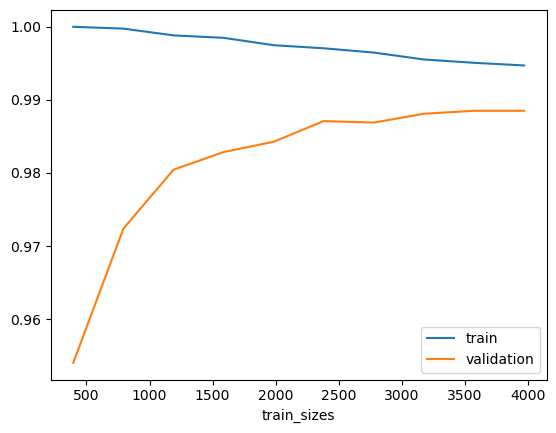

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import xgboost as xgb  # Make sure you have the XGBoost library installed
xgb_classifier = xgb.XGBClassifier(**params)

N,train_score,val_score=learning_curve(xgb_classifier,X_train,y_train,train_sizes = np.linspace(0.1, 1.0, 10),cv=5)
print(N)
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.xlabel('train_sizes')
plt.legend()

# cm of svc

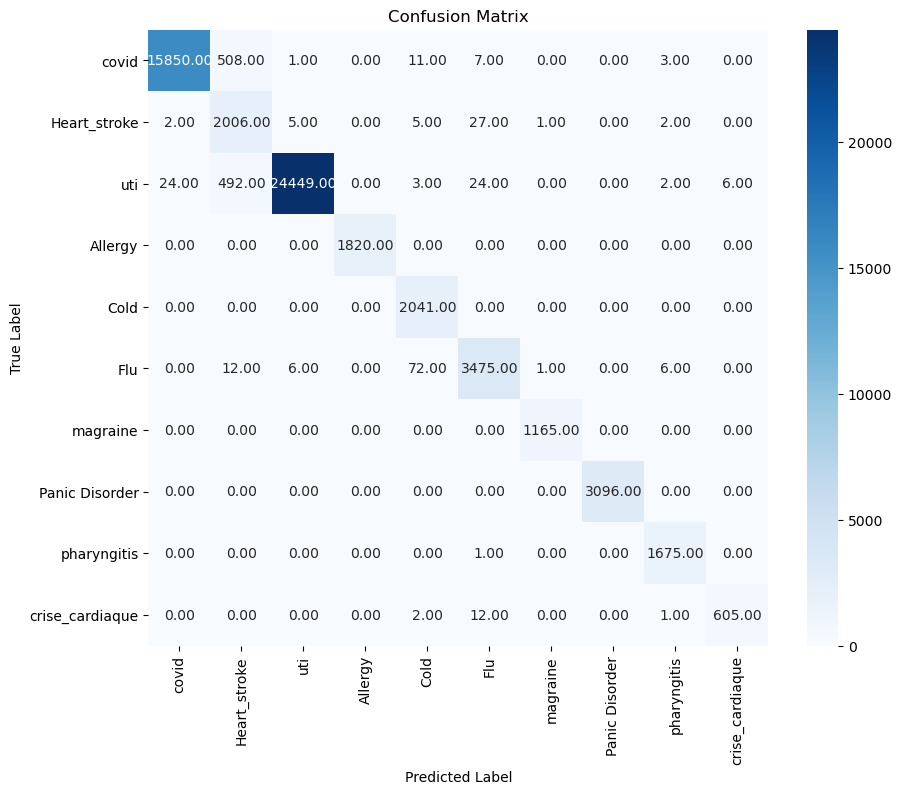

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 8))  # Increase the figure size to accommodate more classes
    sns.heatmap(cm, annot=True, fmt='.2f', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Assuming you have a list of class names for the 10 classes
class_names = data['target'].unique()
# Assuming you have your true labels (y_true) and predicted labels (y_pred)
# Replace y_true and y_pred with your actual true labels and predicted labels, respectively
label_encoder = LabelEncoder()
y_true = label_encoder.fit_transform(data['target'].values)
y_pred = model.predict(X)
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plot_confusion_matrix(cm, classes=class_names, normalize=False, title='Confusion Matrix')


# cm of xgboost

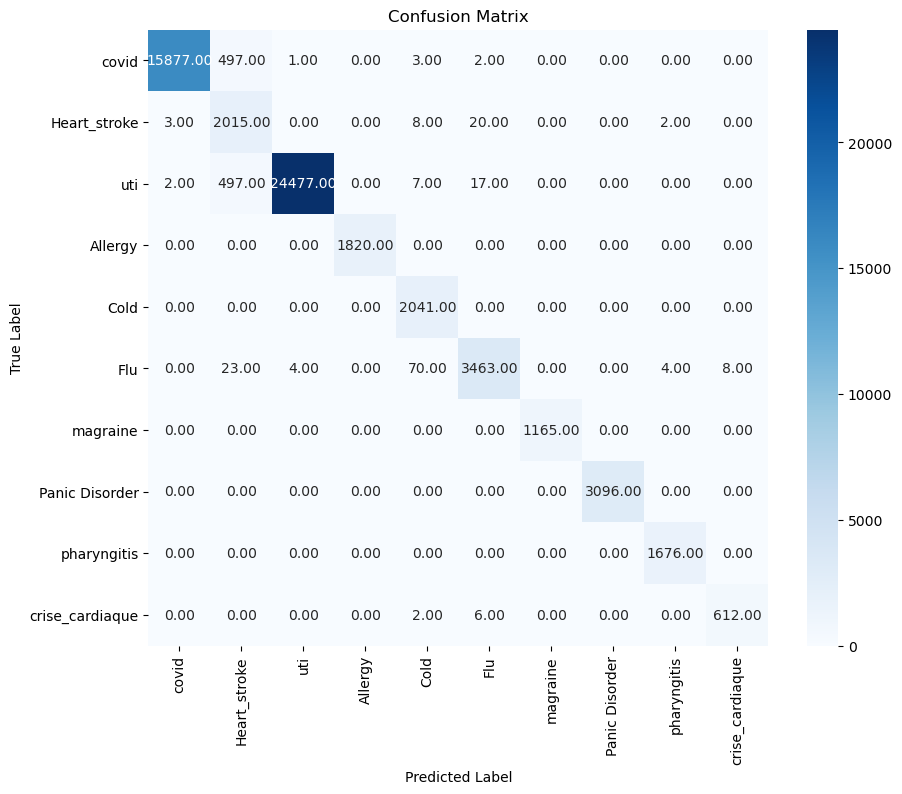

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 8))  # Increase the figure size to accommodate more classes
    sns.heatmap(cm, annot=True, fmt='.2f', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Assuming you have a list of class names for the 10 classes
class_names = data['target'].unique()
# Assuming you have your true labels (y_true) and predicted labels (y_pred)
# Replace y_true and y_pred with your actual true labels and predicted labels, respectively
label_encoder = LabelEncoder()
y_true = label_encoder.fit_transform(data['target'].values)
y_pred = model.predict(X)
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plot_confusion_matrix(cm, classes=class_names, normalize=False, title='Confusion Matrix')


In [ ]:
sns.scatterplot(data=data,y='target')
plt.show()

ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=1e+20,
            dtype=float64)

<Figure size 640x480 with 1 Axes>